In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
# we can leverage os packages, whenever we need to interact with operating system-- to create some file at some 
# particular location, or modify the content, or delete, or access multiple files with some path or to access a 
# directory. 

In [3]:
uber_df = pd.read_csv('uber-raw-data-janjune-15_sample.csv')

In [4]:
uber_df.shape

(100000, 4)

In [5]:
type(uber_df)

pandas.core.frame.DataFrame

It is an object of the DataFrame class

In [6]:
uber_df.duplicated()
# shows if the row is duplicated or not
# if duplicated- shows TRUE else shows FALSE

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [7]:
uber_df.duplicated().sum()

54

In [8]:
# to drop the duplicates, we have drop_duplicates function

uber_df.drop_duplicates(inplace = True)

In [9]:
uber_df.duplicated().sum()

0

In [10]:
uber_df.shape

(99946, 4)

In [11]:
uber_df.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [12]:
uber_df.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [13]:
uber_df['Pickup_date']

0        2015-05-02 21:43:00
1        2015-01-20 19:52:59
2        2015-03-19 20:26:00
3        2015-04-10 17:38:00
4        2015-03-23 07:03:00
                ...         
99995    2015-04-13 16:12:00
99996    2015-03-06 21:32:00
99997    2015-03-19 19:56:00
99998    2015-05-02 16:02:00
99999    2015-06-24 16:04:00
Name: Pickup_date, Length: 99946, dtype: object

This is in the form of object instead of datetime like it should be

In [14]:
print(uber_df['Pickup_date'][0])
print(type(uber_df['Pickup_date'][0]))

2015-05-02 21:43:00
<class 'str'>


In [15]:
# let's convert it into datetime since it cannot be in the string format

In [16]:
uber_df['Pickup_date'] = pd.to_datetime(uber_df['Pickup_date'])

In [17]:
uber_df['Pickup_date'].dtype

dtype('<M8[ns]')

'M' in above dtype is "Type character code" for this datetime  --> it is a specific datatype where ns means nanoseconds

--> Based on how pandas package is compiled in our system

In [18]:
type(uber_df['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
# above it shows timestamp
# but when we check the datatype of whole columns of dataframe it shows datetime64

uber_df.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [20]:
# we try and solve answers for problem statements.. 
#1. which month has max. pickups in New York City? 

In [21]:
uber_df

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


In [22]:
# Note that here we do not have a feature of month, but from pickup_date feature, we can extract, month feature.  

In [23]:
uber_df['Pickup_date'].dt.month # dt is a shortform of datetime and it is a pandas accessor. 

0        5
1        1
2        3
3        4
4        3
        ..
99995    4
99996    3
99997    3
99998    5
99999    6
Name: Pickup_date, Length: 99946, dtype: int64

In [24]:
uber_df['Pickup_date'].dt.month_name() # to get name of the month

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: Pickup_date, Length: 99946, dtype: object

In [25]:
uber_df['month'] = uber_df['Pickup_date'].dt.month_name() # adding a new feature month

# here month is called a derived attribute since it is derived from the existing pickup_date attribute 

In [26]:
uber_df.head() 

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month
0,B02617,2015-05-02 21:43:00,B02764,237,May
1,B02682,2015-01-20 19:52:59,B02682,231,January
2,B02617,2015-03-19 20:26:00,B02617,161,March
3,B02764,2015-04-10 17:38:00,B02764,107,April
4,B02764,2015-03-23 07:03:00,B00111,140,March


In [27]:
uber_df['month'].value_counts()

June        19620
May         18660
April       15982
March       15969
February    15896
January     13819
Name: month, dtype: int64

<AxesSubplot: >

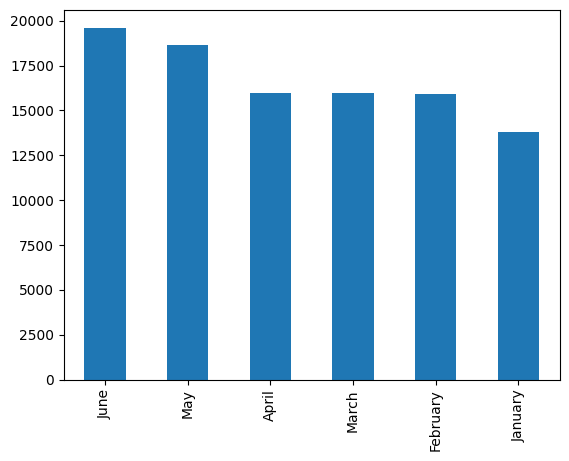

In [28]:
uber_df['month'].value_counts().plot(kind = 'bar')

From the above plot, we coclude that month June has the maximum number of uber pickups  

Now, let's try to retrieve which days of month have highest pickups
And to do so, we need a crosstab of month and weekdays

In [29]:
uber_df['weekday'] = uber_df['Pickup_date'].dt.day_name()
uber_df['day'] = uber_df['Pickup_date'].dt.day

In [30]:
uber_df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10
4,B02764,2015-03-23 07:03:00,B00111,140,March,Monday,23


In [31]:
pivot = pd.crosstab(index = uber_df['month'], columns = uber_df['weekday'])

In [32]:
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


In [33]:
# let's try to make the columns of days in order of usage( weekday/weekend)

In [34]:
pivot = pivot[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace = True]
pivot.head()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (888378467.py, line 1)

<AxesSubplot: xlabel='month'>

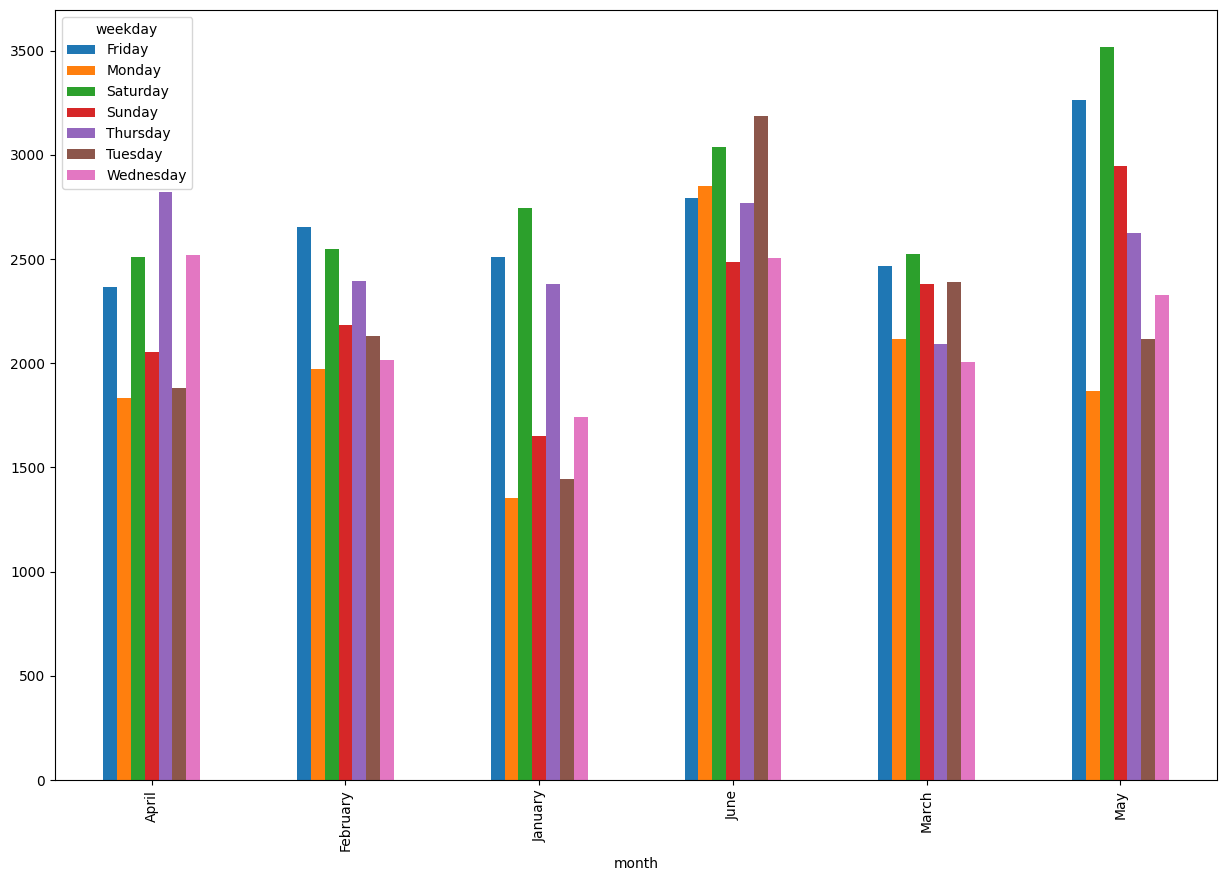

In [35]:
pivot.plot(kind= 'bar', figsize = (15,10))

Though there is no significant pattern that we could observe during weekdays, we can observe that sundays of the week alwasys have lesser pickups than saturdays

In [36]:
# 2. How's the Hourly Rush in New York City on all days? 

Since we need the count of pickups in specific hours, let us first extract the hour attribute from the dataframe

In [37]:
uber_df['hour'] = uber_df['Pickup_date'].dt.hour

In [38]:
uber_df.head(3)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20


In [39]:
hourlyrush = uber_df.groupby(['weekday','hour'], as_index = False).size()

In [40]:
hourlyrush

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


<AxesSubplot: xlabel='hour', ylabel='size'>

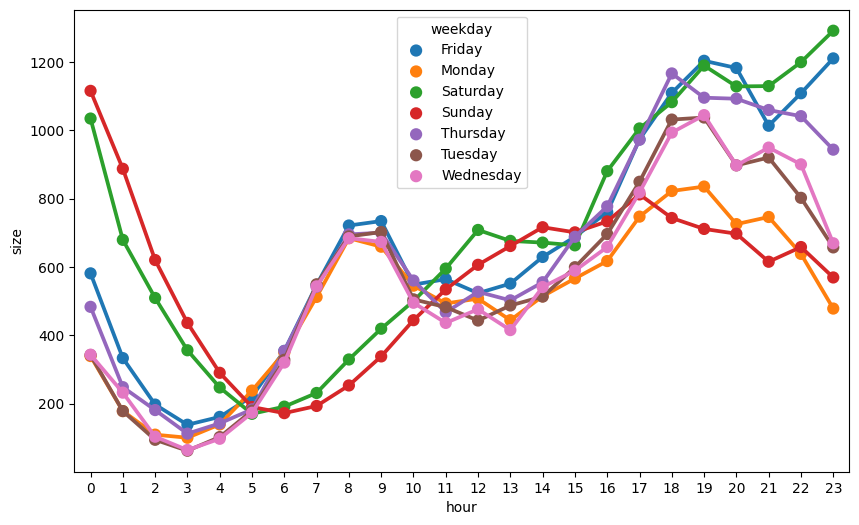

In [41]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'hour',y='size',hue = 'weekday',data = hourlyrush)

We can notice a general trend that, the pickups are high during evenings. Early mornings and afternoons follow low pickups throughout the week except on weekends(saturday and sunday). Also it shows a similar trend during work hours on weekdays, there is an increase in pickups as opposed to weekends. 

--> saturday pickups continues to increase during evenings, but sunday pickups take a down turn during evenings. 
Thursday evenings have a similar trend in comparision to friday and saturday. 

--> We can say that, weekdays has the most demand during evenings and specifically Thursdays, fridays and saturdays have a similar trend during evenings. From this, we can conclude that Newyorkers seem to start their weekend plans or rush starting from Thursdays. Also early mornings of weekend also shows high number of pickups probably because of parties on friday and saturdays. 

In [42]:
# which Base_number has most number of Active vehicles? 

In [43]:
uber_df.columns # here we have base_num features but no active vehicles feature

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', 'month', 'weekday', 'day', 'hour'],
      dtype='object')

In [44]:
import os

In [45]:
os.listdir(r"/Users/hemakarnam/Desktop/arch_unarch/Uber/Datasets")

['other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-janjune-15.csv',
 'other-American_B01362.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [46]:
# when such a situation arises we need to make sure to check the whole dataset files(provided given) if we have 
# the information needed somewhere else. Otherwise talk to clients/ stakeholders to get more data access

In [47]:
uber_foil = pd.read_csv(r"/Users/hemakarnam/Desktop/arch_unarch/Uber/Datasets/Uber-Jan-Feb-FOIL.csv")

In [48]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [49]:
!pip install chart_studio
!pip install plotly

In [50]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [51]:
init_notebook_mode(connected = True)

In [52]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [53]:
px.box(x = 'dispatching_base_number', y = 'active_vehicles', data_frame = uber_foil)
# boxplot returns the five point summary of the data

Violin plot shows both distribution and box plot 

In [54]:
px.violin(x = 'dispatching_base_number', y = 'active_vehicles', data_frame = uber_foil)
# distribution of base number with respect to active vehicles 

In [55]:
# collecting some more data from the dataset and converting into new csv file and preparing it for data analysis

In [56]:
files_uber = os.listdir(r"/Users/hemakarnam/Desktop/arch_unarch/Uber/Datasets")
files_uber

['other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-janjune-15.csv',
 'other-American_B01362.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [57]:
files_uber.remove('uber-raw-data-janjune-15.csv')
files_uber.remove('other-American_B01362.csv')
files_uber.remove('Uber-Jan-Feb-FOIL.csv')
files_uber.remove('other-Highclass_B01717.csv')
files_uber.remove('other-Federal_02216.csv')
files_uber.remove('other-Carmel_B00256.csv')
files_uber.remove('other-Diplo_B01196.csv')
files_uber.remove('other-Dial7_B00887.csv')
files_uber.remove('other-Prestige_B01338.csv')

In [58]:
files_uber

['other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv']

In [59]:
final = pd.DataFrame()

path = r"/Users/hemakarnam/Desktop/arch_unarch/Uber/Datasets"

for file in files_uber:
    current_df = pd.read_csv(path+'/'+file)
    final = pd.concat([current_df, final])

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 82554: invalid start byte

In [61]:
final.head()

,Base Number,Base Name,Pick Up Date,Number of Trips,Number of Vehicles,time_of_trip,start_lat,start_lng,Unnamed: 3
0,B00013,LOVE CORP CAR INC,01/01/2015,26,17,NaN,NaN,NaN,NaN
1,B00014,NY ONE CORP CAR INC,01/01/2015,45,24,NaN,NaN,NaN,NaN
2,B00029,COMMUNITY CAR SVC CORP,01/01/2015,731,36,NaN,NaN,NaN,NaN
3,B00053,CHARGE AND RIDE INC,01/01/2015,10,9,NaN,NaN,NaN,NaN
4,B00095,LIBERTY CAR SERVICE INC.,01/01/2015,814,62,NaN,NaN,NaN,NaN


In [62]:
# lat- latitude, lon- longitude, Base - the code which is affiliated with uber pickup

In [63]:
final.shape

(293882, 9)

In [64]:
final.duplicated().sum()

1

In [65]:
final.drop_duplicates(inplace = True)

In [66]:
final.shape

(293881, 9)

In [67]:
# which locations of Neew York City have more rush? 
# since it's location based, here we use map based visulization

In [76]:
rush_map = final.groupby(['Lat','Lon'], as_index = False).size()

KeyError: 'Lat'

In [ ]:
rush_map.head()

To plot a spatial map, we need a basemap(we can also get specific region using geographical location) 
--> On top of the basemap, we plot a heatmap with the above given dataframe values 

--> For that, we need a package called folium 

In [69]:
!pip install folium

In [70]:
import folium

In [71]:
basemap = folium.Map()

In [72]:
basemap

In [73]:
from folium.plugins import HeatMap

In [74]:
HeatMap(rush_map).add_to(basemap)

NameError: name 'rush_map' is not defined

In [75]:
basemap

From this heatmap, we can say Midtown Manhattan (middle and lower) till upper brooklyn is found to be rush spot for uber pickups

In [ ]:
# Examine Rush on hour and weekday (perform pair wise analysis)

We now construct a pivot table to perform the pair wise analysis for days and hour features. 

In [ ]:
final.head(3)

In [ ]:
final.columns

We now derive hour and day from the Date/Time variable in the final dataframe. k

In [ ]:
final.dtypes

In [ ]:
final['Date/Time'][0]

Here we have 6 values for index 0 since we mapped 6 datasets together previously 

In [ ]:
final["Date/Time"] = pd.to_datetime(final['Date/Time'],format = '%m/%d/%Y %H:%M:%S')
# we convert Date/Time feature into datetime using pandas

In [ ]:
final['Date/Time'].dtype

In [ ]:
final['day'] = final['Date/Time'].dt.day
final['hour'] = final['Date/Time'].dt.hour

In [ ]:
final.head(3)

In [ ]:
pivot = final.groupby(['day','hour']).size().unstack()
# gets a pivot object

In [ ]:
pivot

In [ ]:
# to make pivot table more visually appealing, we use styling on dataframe

In [ ]:
pivot.style.background_gradient()

The darker the color of cell, the more rush there is at that particular hour of the day

In [ ]:
# How to Automate pairwise analysis: 

Incase if we have more than one pair wise analysis to perform, to automate the process of analysis easier, we define a user generated function and call the same whenever needed


In [ ]:
final['weekday'] = final['Date/Time'].dt.day_name()

In [ ]:
final.head()

In [ ]:
# defining a function :

def automate_pivot(df,col1,col2):
    pivot = df.groupby([col1,col2]).size().unstack()
    return pivot.style.background_gradient()

In [ ]:
automate_pivot(final,'hour','weekday')